# PME3481 - Controle e Aplicações

### Configuração do Ambiente e Bibliotecas

Introdução das bibliotecas mais importantes.

In [1]:
%matplotlib inline

import numpy as np
import control as ctrl
import matplotlib.pyplot as plt
import sympy as sy
from tbcontrol.symbolic import routh
import tbcontrol
tbcontrol.expectversion('0.1.8')
import tbcontrol.symbolic

import warnings
warnings.filterwarnings('ignore')

## Forma Linearizada

Dadas as equações não lineares deduzidas pela formualação de Newton-Euler, foi possível desenvolver as formas linearizadas com o auxílio das bibliotecas sympy e tbcontrole.

In [2]:
sy.init_printing()
s = sy.Symbol('s')

### Modelo Linearizado

Lista de constantes

In [3]:
Xcm = 1.052
Xpe = 0.261
L = 3.304
Df = 0.127
Tlin = 230.57
Izz = 15.07
M = 23.545
g = 9.8055
dar = 1.091
Cd = 0.432
Vxlin = -10.0

In [4]:
# X = [x,y,theta,xp,yp,thetap]
# Xp = [xp,yp,thetap,xpp,ypp,thetapp]
A = np.array([[0, 0, 0, 1],
              [(1/M)*((1/2)*dar*Cd*Vxlin**2*L*Df), (1/M)*(Vxlin *dar*Cd*((Df/2)**2*np.pi)), 0, 0],
              [(1/M)*(-M*g+(1/2)*Vxlin**2*dar*Cd*(np.pi*(Df/2)**2)), 0, 0, 0],
              [(1/Izz)*((1/2)*Vxlin**2*dar*Xpe*Cd*(np.pi*(Df/2)**2)), 0, 0, 0]])

B = np.array([[0, 0],
              [1/M, 0],
              [0, -Tlin/M],
              [0, -Tlin*Xcm/Izz]])

C = np.array([[ 1, 0, 0, 0],
              [ 0, 1, 0, 0],
              [ 0, 0, 1, 0],
              [ 0, 0, 0, 1]])

D = np.array([[ 0, 0],
              [ 0, 0],
              [ 0, 0],
              [ 0, 0]])

cont = ctrl.StateSpace(A, B, C, D)

sys = ctrl.ss(A, B, C, D)
sys

<LinearIOSystem:sys[3]:['u[0]', 'u[1]']->['y[0]', 'y[1]', 'y[2]', 'y[3]']>

### Polos, Frequências Naturais e Fatores de Amortecimento

In [5]:
wn, zeta, poles = cont.damp()

print("Frequências Naturais: ")
print(wn)
print("Polos: ")
print(poles)
print("Amortecimento: ")
print(zeta)

Frequências Naturais: 
[0.00253575 0.         0.07190375 0.07190375]
Polos: 
[-0.00253575+0.j  0.        +0.j  0.07190375+0.j -0.07190375+0.j]
Amortecimento: 
[ 1. nan -1.  1.]


Abaixo há, também, o gráfico dos polos do sistema no plano complexo

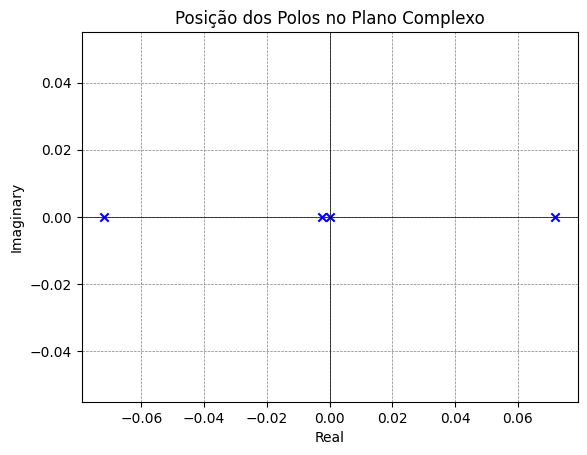

In [6]:
# Plot the poles on a complex plane
plt.figure()
plt.scatter(poles.real, poles.imag, marker='x', color='b')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Posição dos Polos no Plano Complexo')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

### O Critério de Routh-Hurwitz

In [7]:
# Calcula o polinômio característico
char_poly = sy.Poly(np.poly(A), s)
# char_poly = sy.Poly(np.poly(A.ravel()), s)
char_poly

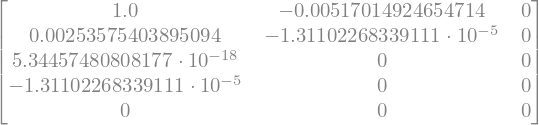

In [8]:
rhm = routh(char_poly)
rhm

## Resposta em Frequência

### Funções de Transferência

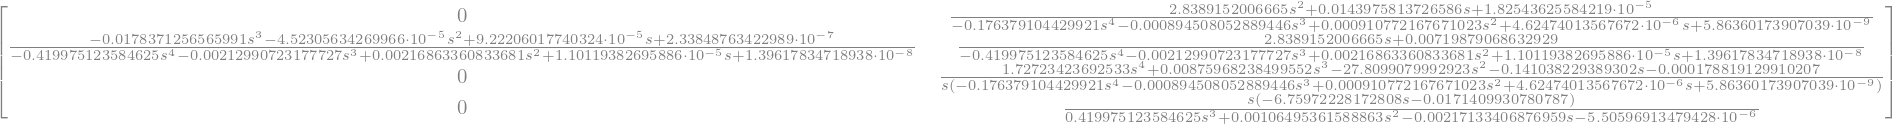

In [9]:
s = sy.symbols('s')
G = sy.simplify(tbcontrol.symbolic.ss2tf(A, B, C, D, s), simplify=False)
G

In [11]:
G1 = ctrl.tf([2.8389152006665, 0.0143975813726586, 1.82543625584219e-5], 
                [-0.176379104429921, -0.000894508052889446, 0.000910772167671023, 4.62474013567672e-6, 5.86360173907039e-9])

G2 = ctrl.tf([-0.0178371256565991, -4.52305634269966e-5, 9.22206017740324e-5, 2.33848763422989e-7], 
                [-0.419975123584625, -0.00212990723177727, 0.00216863360833681, 1.10119382695886e-5, 1.39617834718938e-8])

G3 = ctrl.tf([2.8389152006665, 0.00719879068632929], 
                [-0.419975123584625, -0.00212990723177727, 0.00216863360833681, 1.10119382695886e-5, 1.39617834718938e-8])

G5 = ctrl.tf([1.72723423692533, 0.00875968238499552, -27.8099079992923, -0.141038229389302, -0.000178819129910207], 
                [-0.176379104429921, -0.000894508052889446, 0.000910772167671023, 4.62474013567672e-6, 5.86360173907039e-9, 0])

G7 = ctrl.tf([-6.75972228172808, -0.0171409930780787, 0], 
                [0.419975123584625, 0.00106495361588863, -0.00217133406876959, -5.50596913479428e-6, 0])


### Diagramas de Bode

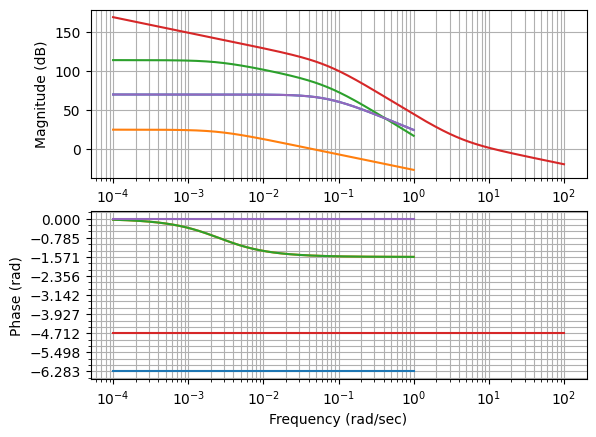

In [12]:
Gs = [G1, G2, G3, G5, G7]

for func in Gs:
    mag,phase,omega = ctrl.bode(func,dB=True,deg=False)   


                  2.839 s^2 + 0.0144 s + 1.825e-05
---------------------------------------------------------------------
-0.1764 s^4 - 0.0008945 s^3 + 0.0009108 s^2 + 4.625e-06 s + 5.864e-09



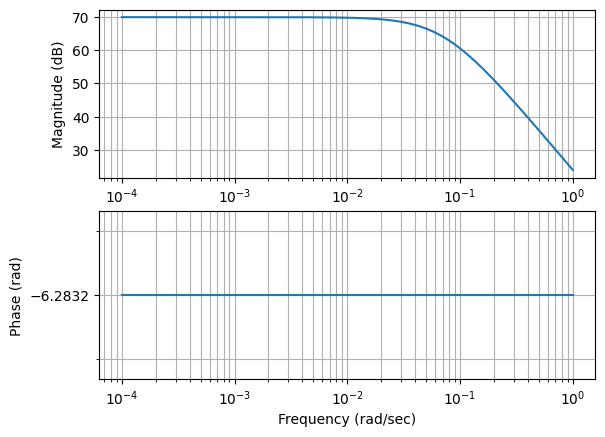

In [13]:
print(G1)
mag,phase,omega = ctrl.bode(G1,dB=True,deg=False)   


     -0.01784 s^3 - 4.523e-05 s^2 + 9.222e-05 s + 2.338e-07
----------------------------------------------------------------
-0.42 s^4 - 0.00213 s^3 + 0.002169 s^2 + 1.101e-05 s + 1.396e-08



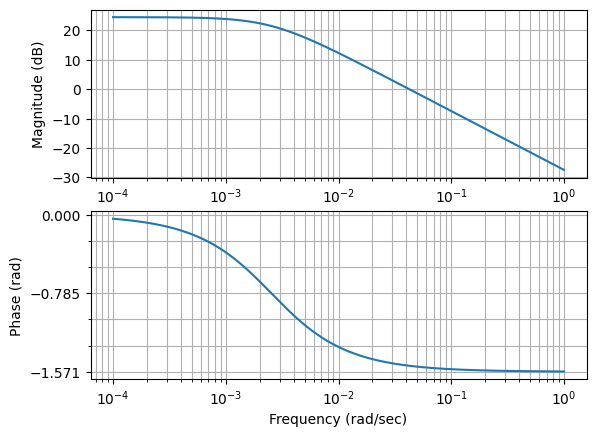

In [14]:
print(G2)
mag,phase,omega = ctrl.bode(G2,dB=True,deg=False)   


                       2.839 s + 0.007199
----------------------------------------------------------------
-0.42 s^4 - 0.00213 s^3 + 0.002169 s^2 + 1.101e-05 s + 1.396e-08



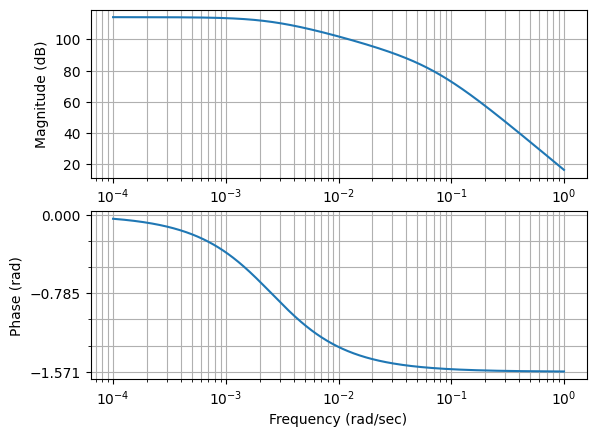

In [15]:
print(G3)
mag,phase,omega = ctrl.bode(G3,dB=True,deg=False)   


        1.727 s^4 + 0.00876 s^3 - 27.81 s^2 - 0.141 s - 0.0001788
-------------------------------------------------------------------------
-0.1764 s^5 - 0.0008945 s^4 + 0.0009108 s^3 + 4.625e-06 s^2 + 5.864e-09 s



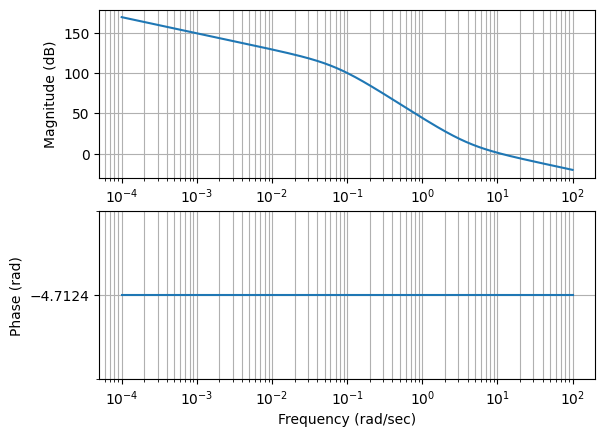

In [16]:
print(G5)
mag,phase,omega = ctrl.bode(G5,dB=True,deg=False)   


               -6.76 s^2 - 0.01714 s
----------------------------------------------------
0.42 s^4 + 0.001065 s^3 - 0.002171 s^2 - 5.506e-06 s



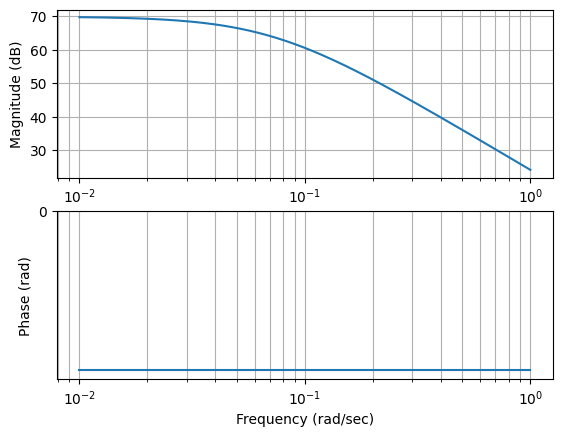

In [17]:
print(G7)
w = np.logspace(-2,0,200)
mag,phase,omega = ctrl.bode(G7,w,dB=True,deg=False)   